In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

data = pd.read_excel('Malaria_Research_Data.xlsx', header=0)
total_spectra = data.groupby('Biological sample category')['Protein percentage of total spectra'].sum()

# Normalize the protein percentages within each group
data['Normalized protein percentage'] = data.groupby('Biological sample category')['Protein percentage of total spectra'].transform(lambda x: (x / x.sum()) * 100)

# Calculate the corrected normalized protein percentage
data['Corrected normalized protein percentage'] = data.groupby('Biological sample category')['Normalized protein percentage'].transform(lambda x: (x / x.sum()) * 100)

print(data)

                                  Experiment name Biological sample category   
0        SPP vs. NAT coIP results recieved 1.9.23                        NAT  \
1        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
2        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
3        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
4        SPP vs. NAT coIP results recieved 1.9.23                        NAT   
...                                           ...                        ...   
19259  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19260  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19261  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19262  SPP vs. NAT coIP results recieved 11.15.22                        SPP   
19263  SPP vs. NAT coIP results recieved 11.15.22                        SPP   

                                       

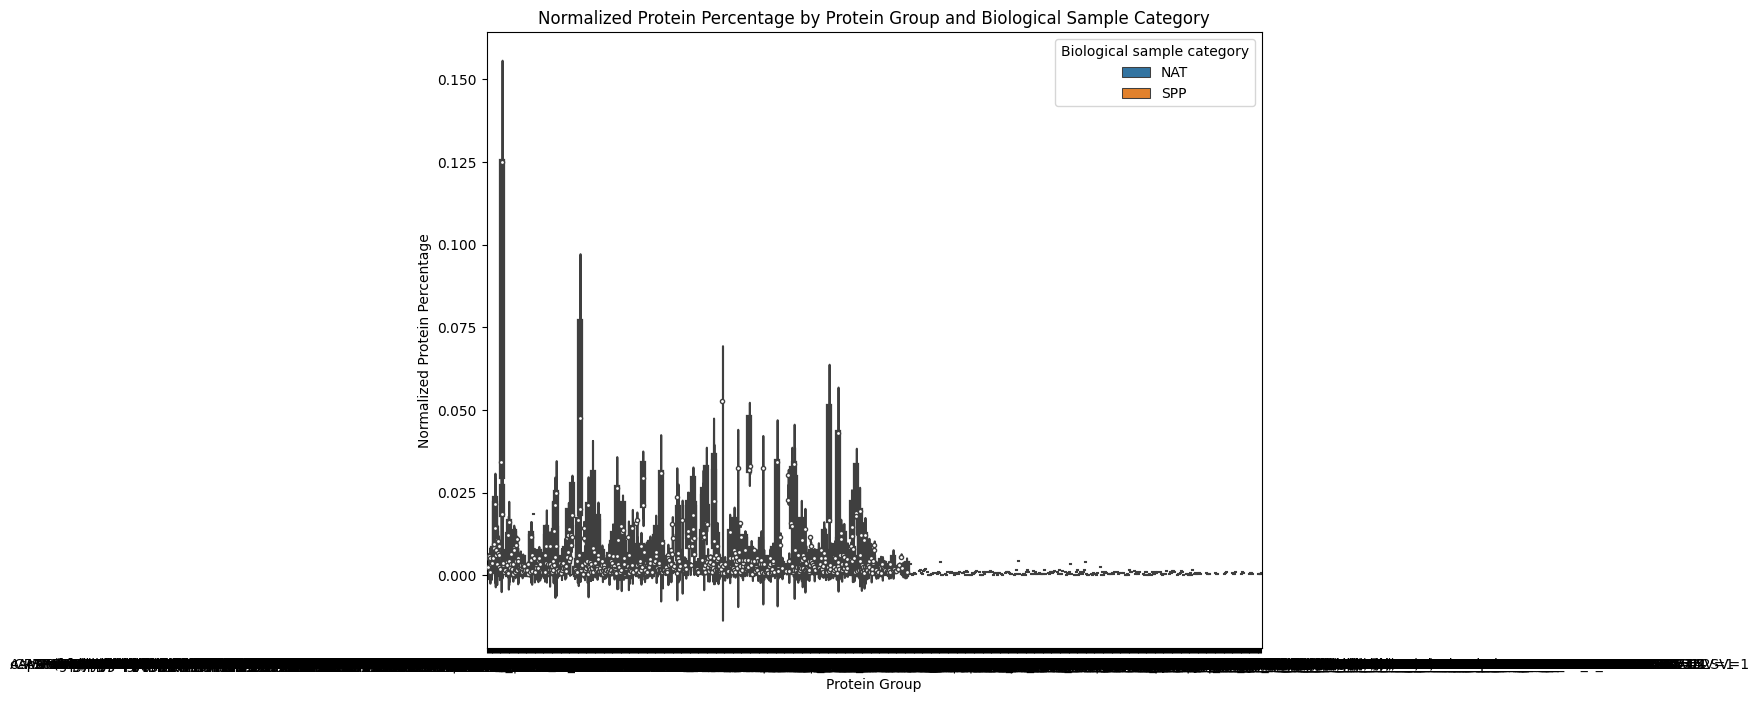

In [10]:
# Select the columns for the violin plot
violin_data = data[['Protein group', 'Biological sample category', 'Normalized protein percentage']]

# Create the violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='Protein group', y='Normalized protein percentage', hue='Biological sample category', data=violin_data)

# Add title and labels
plt.title('Normalized Protein Percentage by Protein Group and Biological Sample Category')
plt.xlabel('Protein Group')
plt.ylabel('Normalized Protein Percentage')

# Show the violin plot
plt.show()



In [10]:
# Filter proteins for SPP and NAT
spp_proteins = data[data['Biological sample category'] == 'SPP']
nat_proteins = data[data['Biological sample category'] == 'NAT']

# Calculate the mean normalized protein percentage for SPP and NAT
spp_mean_percentage = spp_proteins['Normalized protein percentage'].mean()
nat_mean_percentage = nat_proteins['Normalized protein percentage'].mean()

# Identify proteins that show up more in SPP than in NAT
enriched_proteins = spp_proteins[spp_proteins['Normalized protein percentage'] > nat_mean_percentage]

# Group the filtered data by protein name and calculate counts
protein_counts = enriched_proteins.groupby('Protein name').size().reset_index(name='Count')

# Sort the proteins based on counts in descending order
sorted_proteins = protein_counts.sort_values('Count', ascending=False)

# Create a list to store the unique GN names
unique_gn_list = []

# Print the count and names of the enriched proteins
print("Number of proteins showing up more in SPP than in NAT: {}".format(len(sorted_proteins)))
print("Protein names and their counts:")
for index, row in sorted_proteins.iterrows():
    protein_name = row['Protein name']
    count = row['Count']
    gn_index = protein_name.find('GN=')
    if gn_index != -1:
        gn_name = protein_name[gn_index+3:].split(' ')[0]
        unique_gn_list.append(gn_name)
        print("{}, Count: {}".format(gn_name, count))
    else:
        print("GN Name: Not found, Count: {}".format(count))


Number of proteins showing up more in SPP than in NAT: 52
Protein names and their counts:
PF3D7_1408600, Count: 200
PF3D7_0719600, Count: 167
PF3D7_0818900, Count: 137
PF3D7_1357000, Count: 120
PF3D7_0929400, Count: 117
PF3D7_1462800, Count: 105
PF3D7_1027300, Count: 94
PF3D7_1338200, Count: 84
PF3D7_1108700, Count: 81
PF3D7_0516200, Count: 78
PF3D7_0917900, Count: 73
PF3D7_0507100, Count: 69
PF3D7_0312800, Count: 68
PF3D7_1342000, Count: 66
PF3D7_0618300, Count: 65
PF3D7_1126200, Count: 64
PF3D7_1105400, Count: 55
MAL3P7.35, Count: 54
PF3D7_0519400, Count: 54
PF3D7_1451900, Count: 54
PF3D7_0708400, Count: 53
PF3D7_1242700, Count: 53
PF3D7_1142500, Count: 52
PF3D7_0629200, Count: 51
PF3D7_0813900, Count: 51
PF3D7_1347500, Count: 49
PF3D7_1445900, Count: 44
PF3D7_1437900, Count: 43
PF3D7_1104400, Count: 43
FBPA, Count: 42
PF3D7_1323400, Count: 42
PF3D7_1302800, Count: 42
PF3D7_0306900, Count: 41
PF3D7_1130100, Count: 41
PF3D7_1010700, Count: 41
PF3D7_1224300, Count: 39
PF3D7_1424100, Co

/tmp/ipykernel_12158/4176762835.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


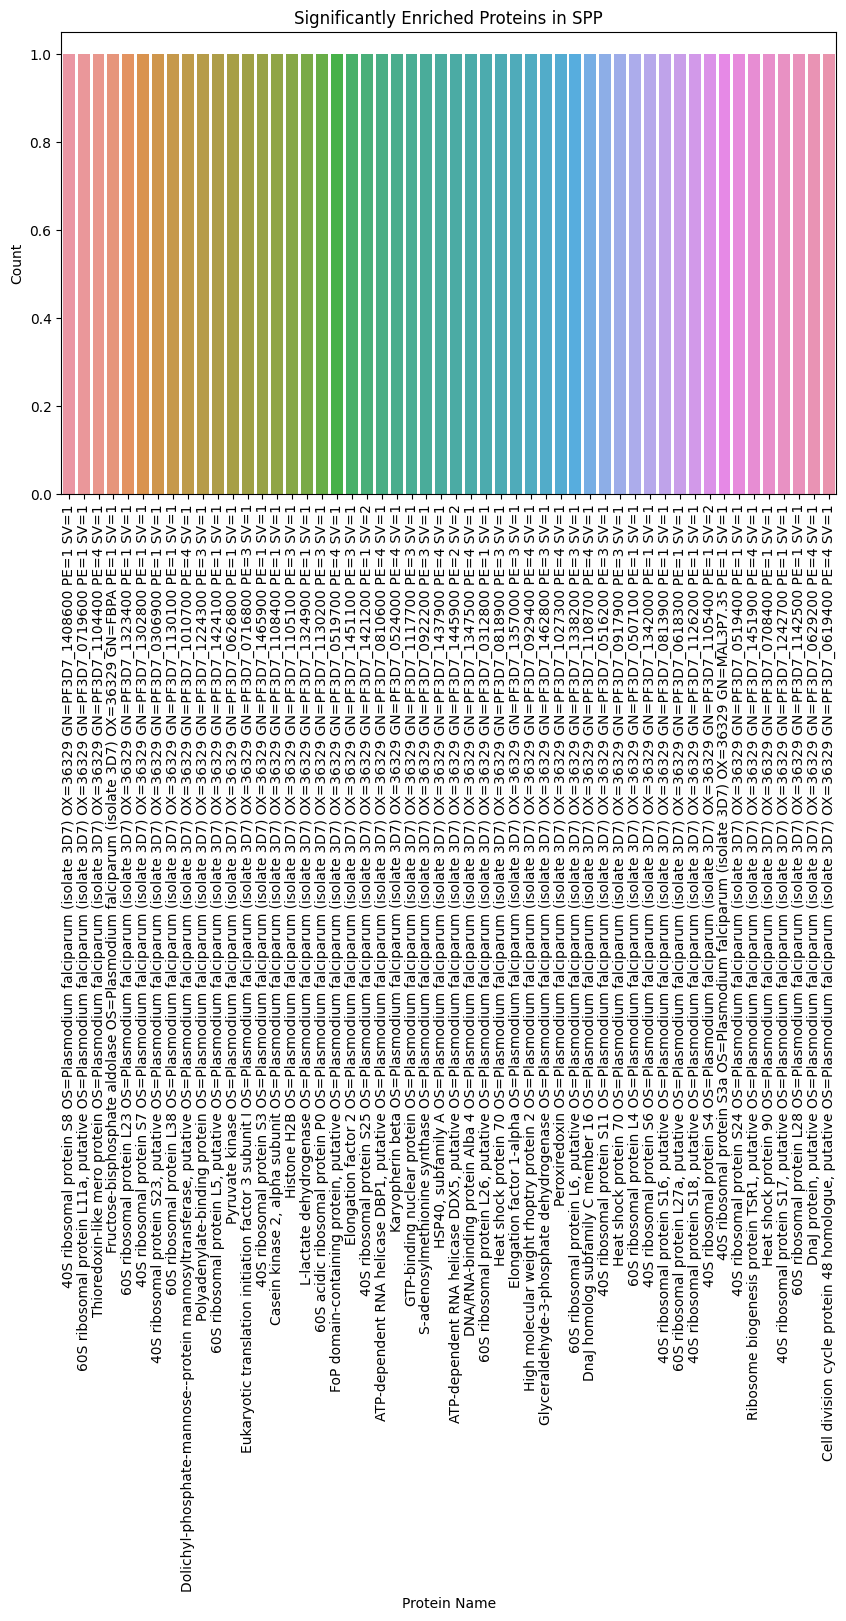

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

protein_counts = sorted_proteins['Protein name'].value_counts()

# Subset the protein names to reduce the number of x-axis labels in the plot
subset_protein_names = protein_counts.index[::1]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=subset_protein_names, y=protein_counts.loc[subset_protein_names])
plt.xticks(rotation=90)
plt.xlabel('Protein Name')
plt.ylabel('Count')
plt.title('Significantly Enriched Proteins in SPP')
plt.tight_layout()
plt.show()

